Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

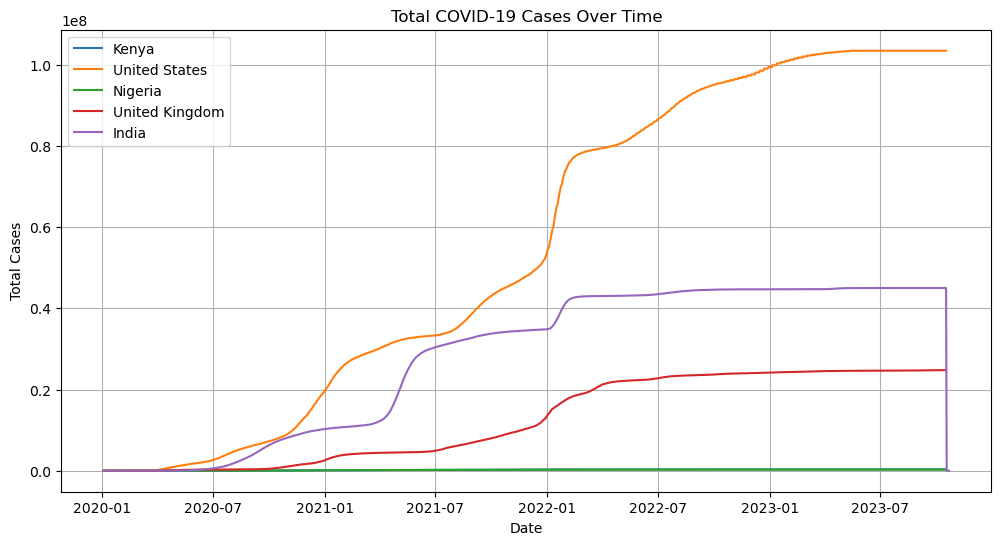

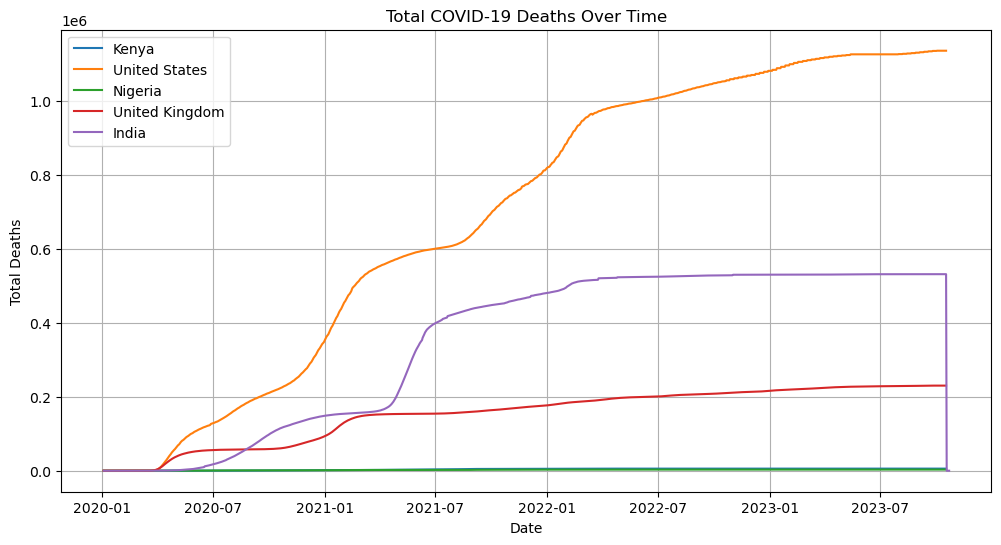

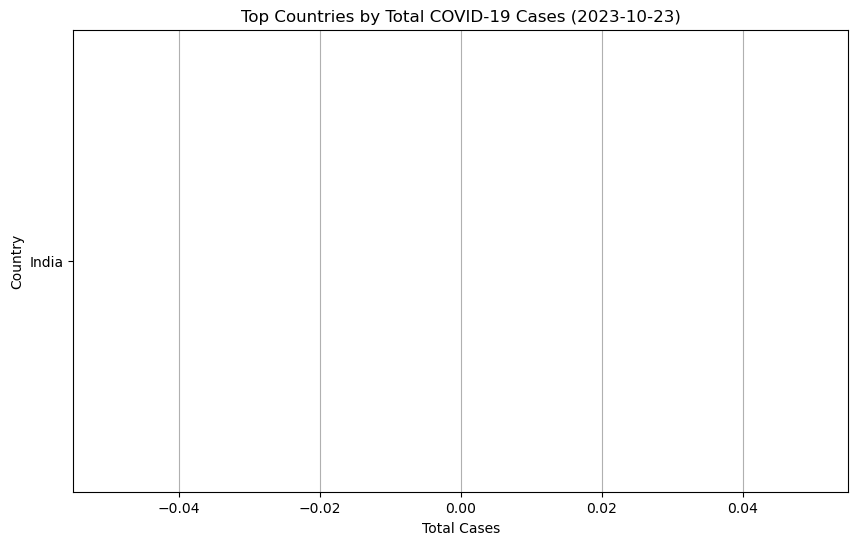

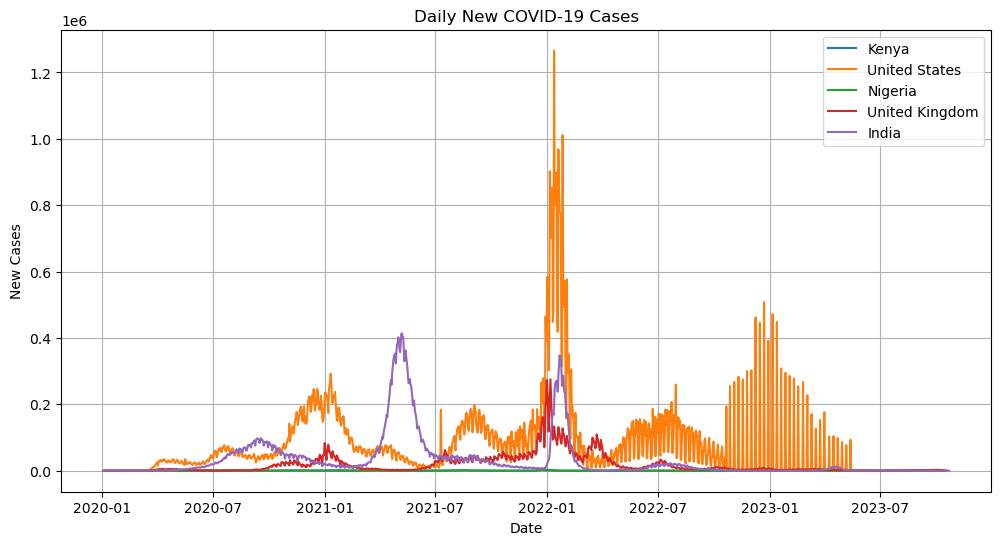

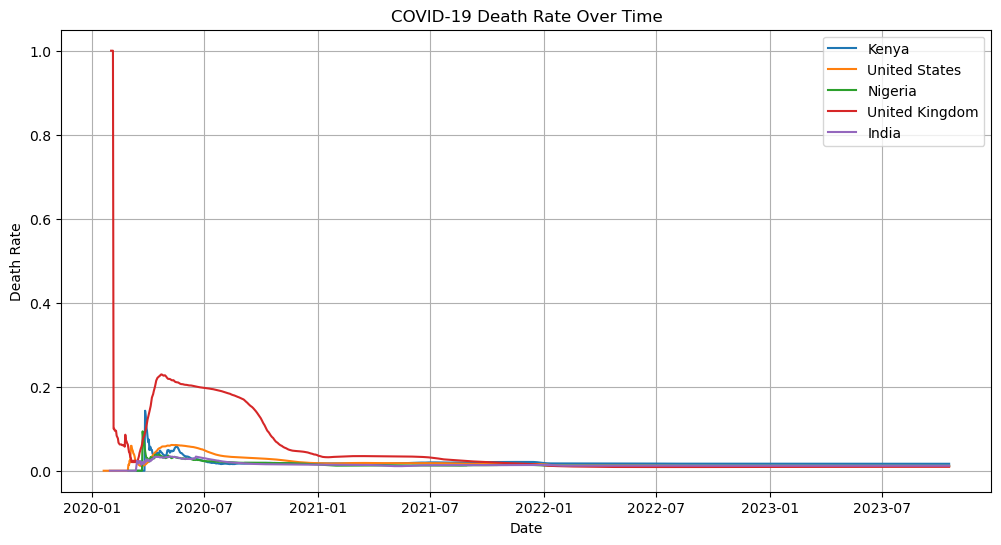

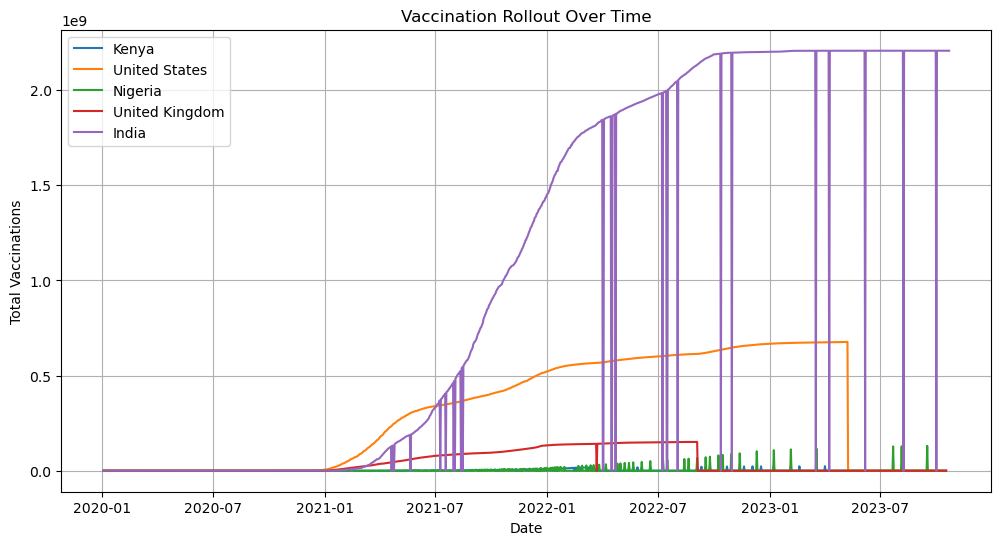

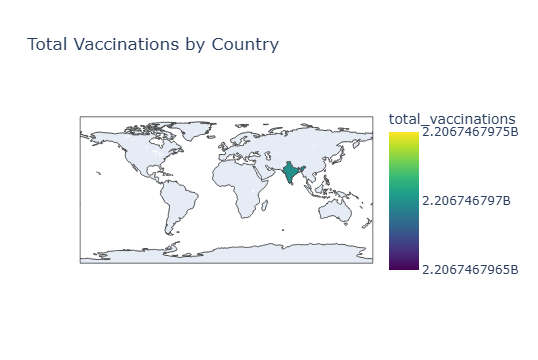

In [8]:
# COVID-19 Global Data Tracker

# Data Loading & Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Display basic info
print("Columns:\n", df.columns)
print("First Rows:\n", df.head())
print("Missing Values:\n", df.isnull().sum())

# Data Cleaning
countries = ['Kenya', 'United States', 'Nigeria', 'United Kingdom', 'India']
df = df[df['location'].isin(countries)]
df['date'] = pd.to_datetime(df['date'])

# Fill missing values in key metrics
critical_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[critical_cols] = df[critical_cols].fillna(0)

# Cases & Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Top Countries by Total Cases 
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_cases = latest_data[['location', 'total_cases']].sort_values(by='total_cases', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cases, x='total_cases', y='location', palette='coolwarm')
plt.title(f'Top Countries by Total COVID-19 Cases ({latest_date.date()})')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

# Daily New Cases
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

# Death Rate Over Time
df['death_rate'] = df['total_deaths'] / df['total_cases'].replace(0, np.nan)
df['death_rate'] = df['death_rate'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    subset = subset.dropna(subset=['death_rate'])
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

#  Vaccination Progress
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Vaccination Rollout Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

# Choropleth Map 
choropleth_data = latest_data[['iso_code', 'location', 'total_vaccinations']].dropna()
fig = px.choropleth(choropleth_data,
                    locations='iso_code',
                    color='total_vaccinations',
                    hover_name='location',
                    color_continuous_scale='Viridis',
                    title='Total Vaccinations by Country')
fig.show()

## Insights from COVID-19 Data

1. **India had the highest total number of COVID-19 cases** among the selected countries, followed by the United States.
2. **Kenya maintained a relatively lower death rat *, indicating either a younger population or better containment in early phases.
3. **The United States had the fastest early vaccine rollout**, but India caught upmid 20212021.
4. **A noticeable spike in new cases was observed in India** durin  mid-2021, which may correspond with the Delta variant outbreak.
5. **Nigeria had consistently low reported case counts**, which could indicate underreporting or successful mitigation strategies.
